In [7]:
from wonambi import Dataset
import matplotlib.pyplot as plt
import numpy as np
from scipy import fft
import pandas as pd
import scipy

In [8]:
d = Dataset('/Users/anastasiafilippova/Downloads/Recording2/Courbes 002.edf')

In [16]:
example = d.read_data(begtime = 0, endtime = 10000)

In [26]:
data = example.data[0]
n = data.shape[0]
names = example.axis['chan'][0]

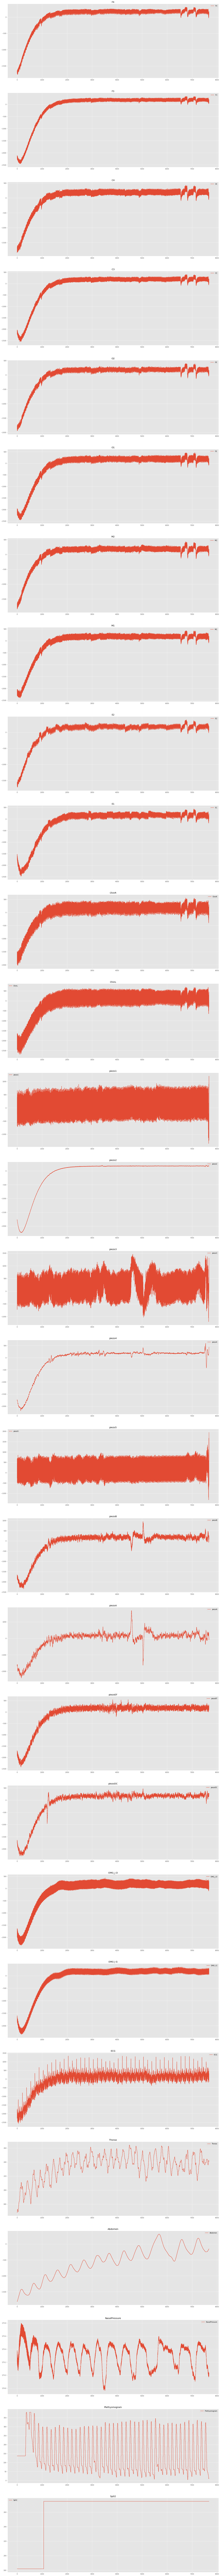

In [28]:
plt.style.use('ggplot')
fig, axs = plt.subplots(n, 1, figsize=(24,300))
start = 1000
stop = 7680+start
y = data[:, start:stop] - np.mean(data[:, start:stop])
for i, ax in enumerate(axs):
    R = scipy.signal.correlate(y[i], y[i], 'same')
#     ax[1].specgram(R)
    ax.plot(y[i], label = names[i])
    ax.set_title(names[i])
    ax.set_xlabel('')
    
    ax.legend()